In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('purchase_behaviour.csv')

In [3]:
new_df = pd.read_csv('transaction_data.csv')

In [4]:
df.sample(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
49282,184169,MIDAGE SINGLES/COUPLES,Mainstream
61058,230211,YOUNG FAMILIES,Budget
56900,215109,MIDAGE SINGLES/COUPLES,Mainstream
58657,221171,OLDER SINGLES/COUPLES,Mainstream
72234,271158,YOUNG SINGLES/COUPLES,Mainstream
36479,134241,NEW FAMILIES,Mainstream
58780,221298,RETIREES,Mainstream
418,2113,YOUNG FAMILIES,Budget
8117,29074,NEW FAMILIES,Mainstream
65604,246093,OLDER SINGLES/COUPLES,Premium


In [5]:
new_df.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
168641,43400,229,229210,231614,58,Red Rock Deli Chikn&Garlic Aioli 150g,2,5.4
94792,43533,203,203278,203473,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6
2836,43524,150,150150,149362,46,Kettle Original 175g,2,10.8
84143,43406,48,48079,43531,73,Smiths Crinkle Cut Salt & Vinegar 170g,2,5.8
191843,43405,97,97074,96740,52,Grain Waves Sour Cream&Chives 210G,2,7.2
85410,43558,65,65119,62160,68,Pringles Chicken Salt Crips 134g,2,7.4
192280,43408,102,102063,101887,84,GrnWves Plus Btroot & Chilli Jam 180g,2,6.2
35502,43411,39,39224,36002,97,RRD Salt & Vinegar 165g,2,6.0
221249,43482,100,100192,99678,66,CCs Nacho Cheese 175g,2,4.2
60342,43641,94,94248,94054,109,Pringles Barbeque 134g,2,7.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [8]:
new_df.describe(exclude = object)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [9]:
df.describe(exclude = object)

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [10]:
len(new_df['PROD_NAME'].unique())

114

# There are total 114 different products 

In [11]:
t1 = new_df.groupby(by = ['PROD_NAME'])

In [12]:
t1['TOT_SALES'].sum().sort_values(ascending = False )

PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
                                             ...   
WW Crinkle Cut      Chicken 175g             4702.2
Sunbites Whlegrn    Crisps Frch/Onin 90g     4600.2
WW Crinkle Cut      Original 175g            4532.2
Woolworths Mild     Salsa 300g               4234.5
Woolworths Medium   Salsa 300g               4050.0
Name: TOT_SALES, Length: 114, dtype: float64

# 3 MOST PROFITABLE PRODUCTS 
1)  Dorito Corn Chp     Supreme 380g
2)  Smiths Crnkle Chip  Orgnl Big Bag 380g
3)  Smiths Crinkle Chips Salt & Vinegar 330g 

In [13]:
df['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

<Axes: xlabel='PREMIUM_CUSTOMER', ylabel='count'>

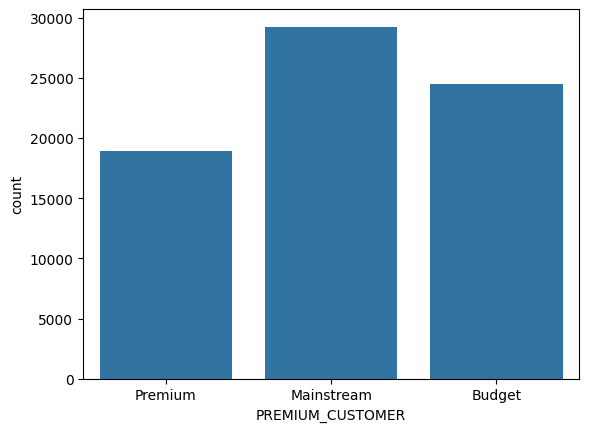

In [14]:
sns.countplot(df, x = 'PREMIUM_CUSTOMER')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'YOUNG SINGLES/COUPLES'),
  Text(1, 0, 'YOUNG FAMILIES'),
  Text(2, 0, 'OLDER SINGLES/COUPLES'),
  Text(3, 0, 'MIDAGE SINGLES/COUPLES'),
  Text(4, 0, 'NEW FAMILIES'),
  Text(5, 0, 'OLDER FAMILIES'),
  Text(6, 0, 'RETIREES')])

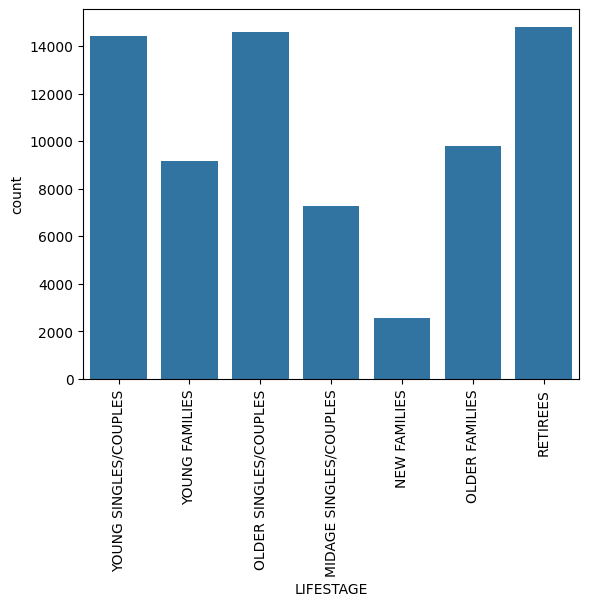

In [25]:
sns.countplot(df, x = 'LIFESTAGE')
plt.xticks(rotation = 'vertical')

# Customer details
1) Most customers are Mainstream buyers i.e 29245(count) after that we have Budget Buyers i.e 24470 andthen Premium Buyers with the no. of  18922.
2) Most customers are  retired , older single/couples and also youngsingles/couples.

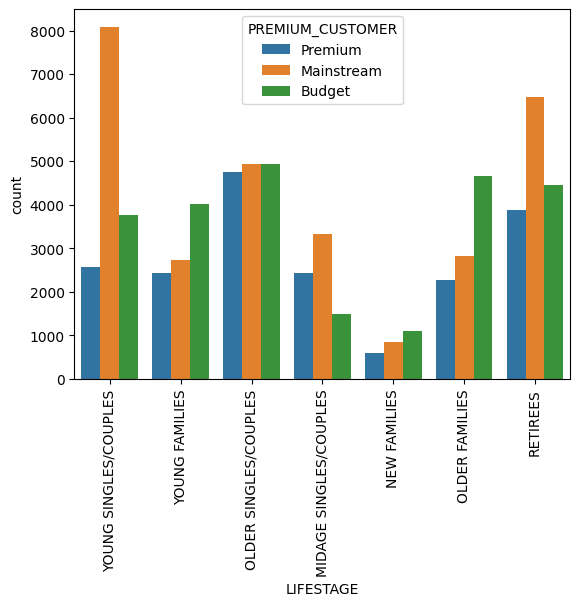

In [15]:
sns.countplot(df, x = 'LIFESTAGE', hue = 'PREMIUM_CUSTOMER')
plt.xticks(rotation = 'vertical')
plt.show()

# *Insight*
1) Most mainstream buyers are either young singles or couples
2) Most Bugdet customers are mostly older singles/ couples or belong to older families or retired
3) Premium budget customers mostly are older singles/ couples or retired

In [16]:
detail = pd.merge(df , new_df , how = 'outer' , on = 'LYLTY_CARD_NBR')

# Join The two tables

In [17]:
detail

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9
...,...,...,...,...,...,...,...,...,...,...
264831,2370701,YOUNG FAMILIES,Mainstream,43442,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2
264832,2370751,YOUNG FAMILIES,Premium,43374,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
264833,2370961,OLDER FAMILIES,Budget,43397,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
264834,2370961,OLDER FAMILIES,Budget,43400,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2


In [18]:
prod = detail.groupby(by = ['PROD_NAME'])

In [19]:
prod['TOT_SALES'].sum().sort_values(ascending = False).head(3)

PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64

C:\Users\shour\AppData\Local\Temp\ipykernel_22896\1315536464.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  prod.get_group(item)['LIFESTAGE'].value_counts()
C:\Users\shour\AppData\Local\Temp\ipykernel_22896\1315536464.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sns.countplot(prod.get_group(item) , x = 'LIFESTAGE')


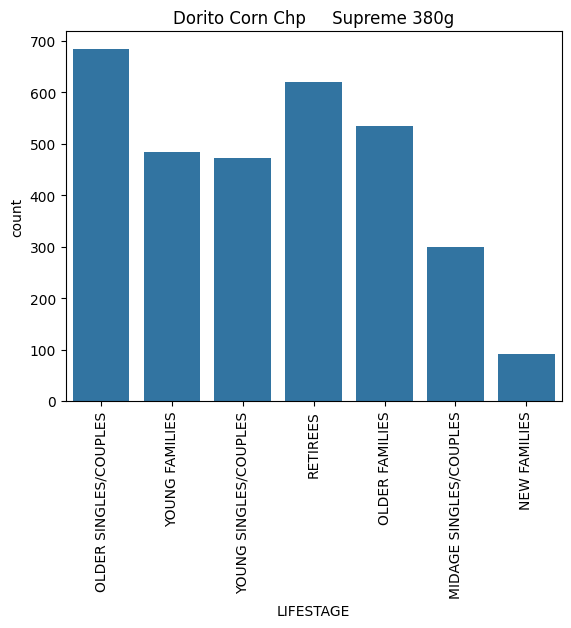

C:\Users\shour\AppData\Local\Temp\ipykernel_22896\1315536464.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  prod.get_group(item)['LIFESTAGE'].value_counts()
C:\Users\shour\AppData\Local\Temp\ipykernel_22896\1315536464.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sns.countplot(prod.get_group(item) , x = 'LIFESTAGE')


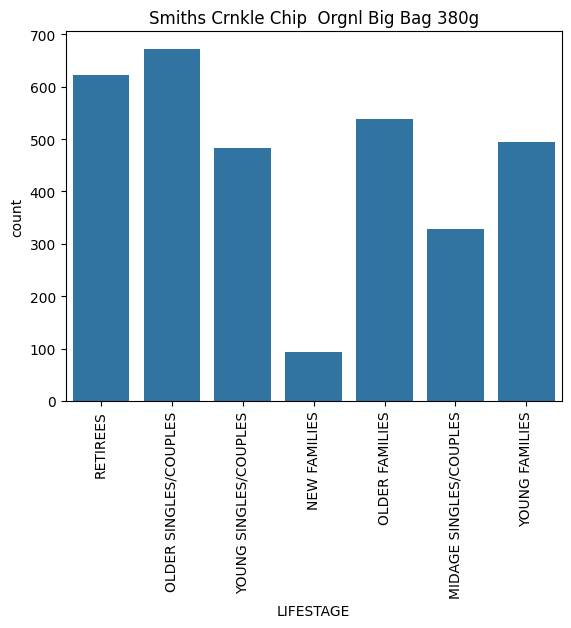

C:\Users\shour\AppData\Local\Temp\ipykernel_22896\1315536464.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  prod.get_group(item)['LIFESTAGE'].value_counts()
C:\Users\shour\AppData\Local\Temp\ipykernel_22896\1315536464.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sns.countplot(prod.get_group(item) , x = 'LIFESTAGE')


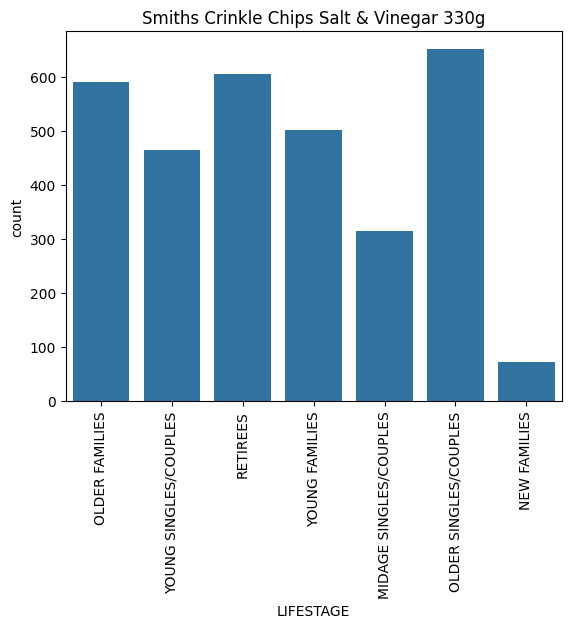

In [21]:
profitable_products = ['Dorito Corn Chp     Supreme 380g','Smiths Crnkle Chip  Orgnl Big Bag 380g', 'Smiths Crinkle Chips Salt & Vinegar 330g']
for item in profitable_products:
    
    prod.get_group(item)['LIFESTAGE'].value_counts()
    sns.countplot(prod.get_group(item) , x = 'LIFESTAGE')
    plt.title(item)
    plt.xticks(rotation = 'vertical')
    plt.show()

C:\Users\shour\AppData\Local\Temp\ipykernel_22896\4282919600.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  prod.get_group(item)['PREMIUM_CUSTOMER'].value_counts()
C:\Users\shour\AppData\Local\Temp\ipykernel_22896\4282919600.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sns.countplot(prod.get_group(item) , x = 'PREMIUM_CUSTOMER')


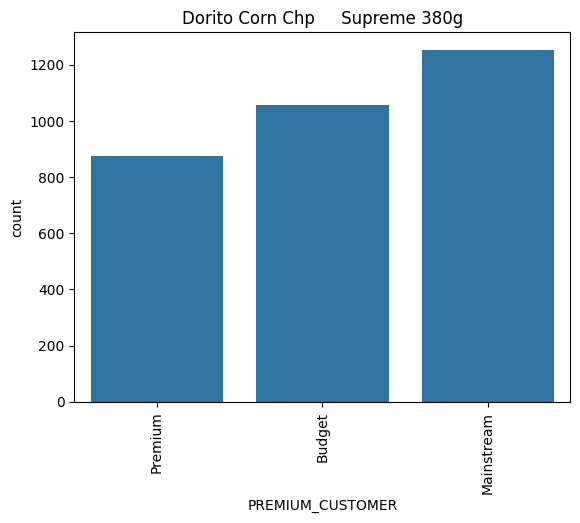

C:\Users\shour\AppData\Local\Temp\ipykernel_22896\4282919600.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  prod.get_group(item)['PREMIUM_CUSTOMER'].value_counts()
C:\Users\shour\AppData\Local\Temp\ipykernel_22896\4282919600.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sns.countplot(prod.get_group(item) , x = 'PREMIUM_CUSTOMER')


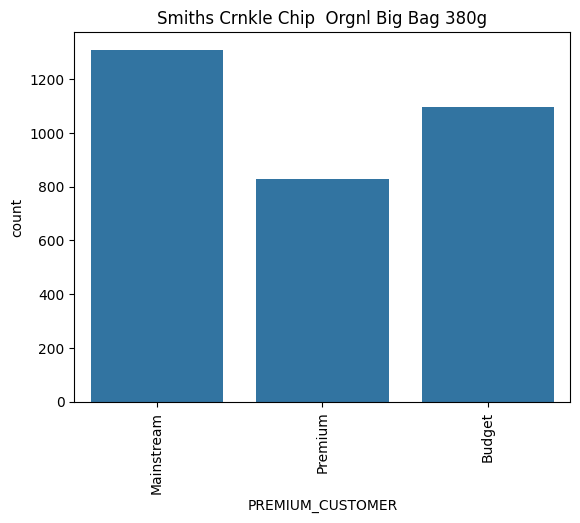

C:\Users\shour\AppData\Local\Temp\ipykernel_22896\4282919600.py:4: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  prod.get_group(item)['PREMIUM_CUSTOMER'].value_counts()
C:\Users\shour\AppData\Local\Temp\ipykernel_22896\4282919600.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sns.countplot(prod.get_group(item) , x = 'PREMIUM_CUSTOMER')


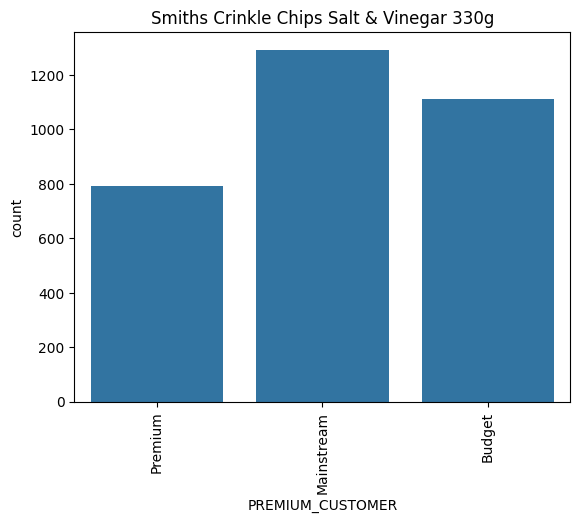

In [23]:
profitable_products = ['Dorito Corn Chp     Supreme 380g','Smiths Crnkle Chip  Orgnl Big Bag 380g', 'Smiths Crinkle Chips Salt & Vinegar 330g']
for item in profitable_products:
    
    prod.get_group(item)['PREMIUM_CUSTOMER'].value_counts()
    sns.countplot(prod.get_group(item) , x = 'PREMIUM_CUSTOMER')
    plt.title(item)
    plt.xticks(rotation = 'vertical')
    plt.show()

## we have got the info about customers who bought the 3 most profitable products and represented that through histogram .
